In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [2]:
df1 = pd.read_csv('/content/drive/MyDrive/Agriculture/user1_data.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Agriculture/user2_data.csv')

In [3]:
df1.head()

,ttime,pm1,pm2,pm3,am,sm,st,lum
0,2022-07-18 15:42:55,3.63,0.0,0.0,3.2,7813.0,25.65,15001.0
1,2022-07-18 15:47:55,4.19,0.0,0.0,4.8,7692.0,25.66,13863.0
2,2022-07-18 15:52:55,4.74,0.0,0.0,4.0,7813.0,25.67,13788.0
3,2022-07-18 15:57:55,5.30,0.0,0.0,4.8,7813.0,25.68,14383.0
4,2022-07-18 16:02:55,0.55,5.3,5.3,3.2,7813.0,25.69,14621.0


In [4]:
df2.head()

,ttime,pm1,pm2,pm3,am,sm,lum,temp,humd,pres
0,2022-07-18 15:39:58,0.83,0.00,0.00,0.0,7463.0,6547.0,23.02,90.57,92849.25
1,2022-07-18 15:44:55,1.39,0.00,0.00,0.0,7576.0,10249.0,23.47,88.37,92848.31
2,2022-07-18 15:49:55,1.95,0.00,0.00,0.0,7576.0,12636.0,23.64,85.26,92844.82
3,2022-07-18 15:54:55,2.51,0.00,0.00,0.0,7463.0,8318.0,23.62,85.93,92834.94
4,2022-07-18 15:59:56,0.55,2.51,2.51,0.0,7463.0,4149.0,23.82,86.06,92815.25


In [5]:
df1.shape

(19341, 8)

In [6]:
df2.shape

(20166, 10)

In [7]:
df1.describe()

,pm1,pm2,pm3,am,sm,st,lum
count,19341.000000,19341.000000,19341.000000,19341.000000,19341.000000,19341.000000,19341.000000
mean,1.610847,2.633942,60.393699,2.015076,4288.940593,26.852714,2714.784292
std,1.058214,1.293359,28.344044,2.280934,2901.962556,1.163759,4231.353590
min,0.550000,0.000000,0.000000,0.000000,286.000000,24.040000,0.000000
25%,0.550000,1.670000,38.550000,0.000000,541.000000,26.110000,1.000000
50%,1.110000,2.230000,51.400000,1.600000,6173.000000,26.700000,6.000000
75%,2.230000,3.350000,77.110000,3.200000,6667.000000,27.390000,4675.000000
max,6.700000,6.700000,153.660000,18.390000,7937.000000,31.170000,19288.000000


In [8]:
df2.describe()

,pm1,pm2,pm3,am,sm,lum,temp,humd,pres
count,20166.000000,20166.000000,20166.000000,20166.000000,20166.000000,20166.000000,20166.000000,20166.000000,20166.000000
mean,1.585495,2.581223,59.172185,0.729346,4339.095656,2891.423039,22.625972,78.329035,93154.619405
std,1.045641,1.288723,28.166706,1.795355,3077.733911,4277.275782,4.666760,24.007034,290.963485
min,0.550000,0.000000,0.000000,0.000000,0.000000,0.000000,8.610000,13.320000,92352.450000
25%,0.550000,1.670000,36.880000,0.000000,465.250000,2.000000,20.000000,61.690000,92976.272500
50%,1.110000,2.230000,51.400000,0.000000,6410.000000,165.500000,21.430000,88.220000,93152.930000
75%,2.230000,3.350000,77.110000,0.000000,7042.000000,5275.000000,26.110000,100.000000,93350.997500
max,6.700000,6.700000,153.660000,18.390000,7937.000000,19767.000000,36.880000,100.000000,94042.780000


Preprocessing of data


In [9]:
df1.isna().sum()


ttime    0
pm1      0
pm2      0
pm3      0
am       0
sm       0
st       0
lum      0
dtype: int64

In [10]:
df2.isna().sum()

ttime    0
pm1      0
pm2      0
pm3      0
am       0
sm       0
lum      0
temp     0
humd     0
pres     0
dtype: int64

In [11]:
for column_name in df1.columns:
    column = df1[column_name]
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  ttime  is :  0
Count of zeros in column  pm1  is :  0
Count of zeros in column  pm2  is :  4
Count of zeros in column  pm3  is :  4
Count of zeros in column  am  is :  6643
Count of zeros in column  sm  is :  0
Count of zeros in column  st  is :  0
Count of zeros in column  lum  is :  86


In [12]:
for column_name in df2.columns:
    column = df2[column_name]
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  ttime  is :  0
Count of zeros in column  pm1  is :  0
Count of zeros in column  pm2  is :  4
Count of zeros in column  pm3  is :  4
Count of zeros in column  am  is :  15851
Count of zeros in column  sm  is :  65
Count of zeros in column  lum  is :  545
Count of zeros in column  temp  is :  0
Count of zeros in column  humd  is :  0
Count of zeros in column  pres  is :  0


In [13]:
del(df1['ttime'])
del(df2['ttime'])

In [14]:
for column in df1.columns:
    col_mean = df1[column].mean()
    df1[column] = df1[column].replace(0, col_mean)

In [15]:
for column in df2.columns:
    col_mean = df2[column].mean()
    df2[column] = df2[column].replace(0, col_mean)

In [16]:
for column_name in df1.columns:
    column = df1[column_name]
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  pm1  is :  0
Count of zeros in column  pm2  is :  0
Count of zeros in column  pm3  is :  0
Count of zeros in column  am  is :  0
Count of zeros in column  sm  is :  0
Count of zeros in column  st  is :  0
Count of zeros in column  lum  is :  0


In [17]:
for column_name in df2.columns:
    column = df2[column_name]
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  pm1  is :  0
Count of zeros in column  pm2  is :  0
Count of zeros in column  pm3  is :  0
Count of zeros in column  am  is :  0
Count of zeros in column  sm  is :  0
Count of zeros in column  lum  is :  0
Count of zeros in column  temp  is :  0
Count of zeros in column  humd  is :  0
Count of zeros in column  pres  is :  0


Heatmap of 1st dataset


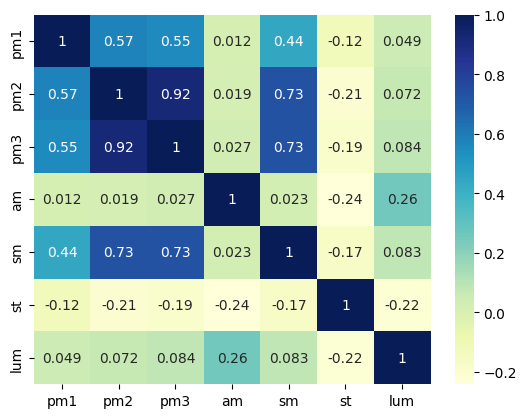

In [18]:
sns.heatmap(df1.corr(), cmap="YlGnBu", annot = True)
plt.show()

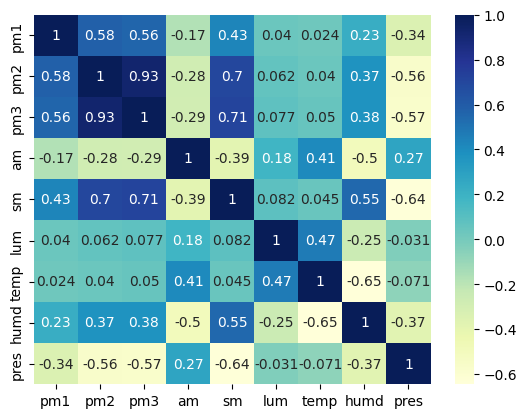

In [19]:
sns.heatmap(df2.corr(), cmap="YlGnBu", annot = True)
plt.show()

Train Test Split

In [20]:
X_temp1=df1.drop('sm',axis=1)
Y_temp1=df1.sm
X_temp2=df2.drop('sm',axis=1)
Y_temp2=df2.sm

In [21]:
x1_train, x1_test,y1_train,y1_test = train_test_split(X_temp1,Y_temp1,test_size =0.2)

In [22]:
x2_train, x2_test,y2_train,y2_test = train_test_split(X_temp2,Y_temp2,test_size =0.2)

In [23]:
Multivariable_model1 = LinearRegression()
Multivariable_model2 = LinearRegression()

In [24]:
Multivariable_model1.fit(x1_train,y1_train)
Multivariable_model2.fit(x2_train,y2_train)

LinearRegression()

In [25]:
Multivariable_model1.score(x1_test,y1_test)

0.5582491973323134

In [26]:
Multivariable_model2.score(x2_test,y2_test)

0.7501089830899437

Accuracy of Multivariable linear regression for dataset 2 is 74.50%

In [27]:
poly = PolynomialFeatures(degree=3)
X_poly_train = poly.fit_transform(x1_train)
lin_reg = LinearRegression()
lin_reg.fit(X_poly_train, y1_train)

LinearRegression()

In [28]:
X_poly_test = poly.transform(x1_test)
y_test_pred = lin_reg.predict(X_poly_test)
r2_test = r2_score(y1_test, y_test_pred)
print("R2 score on testing data:", r2_test)

R2 score on testing data: 0.8684790694474562


Accuracy of Multivariable polynomial regression for dataset 1 is 87.07%

In [29]:
poly = PolynomialFeatures(degree=3)
X_poly_train = poly.fit_transform(x2_train)
lin_reg = LinearRegression()
lin_reg.fit(X_poly_train, y2_train)

LinearRegression()

In [30]:
X_poly_test = poly.transform(x2_test)
y_test_pred = lin_reg.predict(X_poly_test)
r2_test = r2_score(y2_test, y_test_pred)
print("R2 score on testing data:", r2_test)

R2 score on testing data: 0.8803631829673841


Accuracy of Multivariable polynomial regression for dataset 2 is 87.43

In [31]:
degrees = [2, 3, 4, 5, 6]

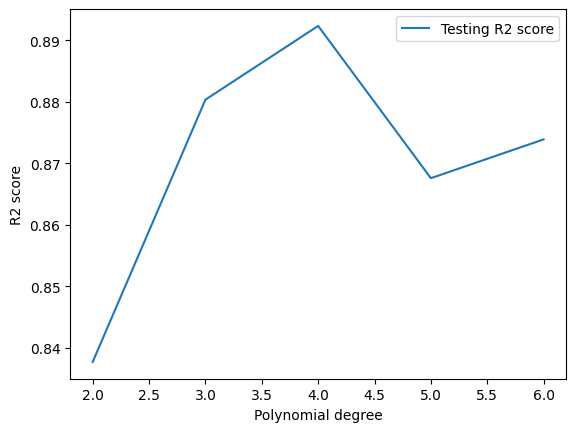

In [32]:
test_scores = []
train_scores = []
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(x2_train)
    X_poly_test = poly.transform(x2_test)
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly_train, y2_train)
    y_train_pred = lin_reg.predict(X_poly_train)
    y_test_pred = lin_reg.predict(X_poly_test)
    train_scores.append(r2_score(y2_train, y_train_pred))
    test_scores.append(r2_score(y2_test, y_test_pred))

# Plot the results
plt.plot(degrees, test_scores, label='Testing R2 score')
plt.xlabel('Polynomial degree')
plt.ylabel('R2 score')
plt.legend()
plt.show()

In [33]:
pred1 = pd.read_csv('/content/drive/MyDrive/Agriculture/user1_data.csv')
pred2 = pd.read_csv('/content/drive/MyDrive/Agriculture/user2_data.csv')

In [34]:
pred2.tail()

,ttime,pm1,pm2,pm3,am,sm,lum,temp,humd,pres
20161,2023-03-10 08:59:16,0.55,1.11,27.38,3.2,327.0,6352.0,27.04,32.24,93560.72
20162,2023-03-10 09:27:12,1.11,1.11,27.38,3.2,327.0,7057.0,28.53,28.69,93574.12
20163,2023-03-10 09:55:12,1.67,1.11,27.38,4.8,327.0,7661.0,30.07,24.39,93571.75
20164,2023-03-10 10:23:12,0.55,1.67,27.93,4.0,327.0,8386.0,31.55,22.99,93558.36
20165,2023-03-10 10:51:14,1.11,1.67,27.93,2.4,328.0,8954.0,32.68,20.85,93541.99


import numpy as np
from google.colab import autoviz

def value_plot(df, y, sort_ascending=False, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['pm1'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, sort_ascending=False, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['pm2'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, sort_ascending=False, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['pm3'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, sort_ascending=False, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_3, *['am'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['pm1'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['pm2'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_6, *['pm3'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_7, *['am'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (8 * figscale, 4.8 * figscale)
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_8, *['ttime'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.6):
  from matplotlib import pyplot as plt
  figsize = (len(colname_pairs) * 10 * figscale, 10 * figscale)
  plt.figure(figsize=figsize)
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    # Note: `32*figscale` may be too large; scaling by # of datapoints may be
    # wiser.
    ax.scatter(df[x_colname], df[y_colname], s=(32 * figscale), alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_9, *[[['pm1', 'pm2'], ['pm2', 'pm3'], ['pm3', 'am'], ['am', 'sm']]], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_10, *['pm1', 'ttime'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_11, *['pm2', 'ttime'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_12, *['pm3', 'ttime'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_13, *['am', 'ttime'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_14, *['ttime', 'pm1', 'ttime'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_15, *['ttime', 'am', 'ttime'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_16, *['ttime', 'humd', 'ttime'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_17, *['ttime', 'pres', 'ttime'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, sort_ascending=False, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_18, *['pm1'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, sort_ascending=False, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_19, *['pm2'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, sort_ascending=False, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_20, *['pm3'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, sort_ascending=False, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_21, *['am'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_22, *['pm1'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_23, *['pm2'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_24, *['pm3'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_25, *['am'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (8 * figscale, 4.8 * figscale)
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_26, *['ttime'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.6):
  from matplotlib import pyplot as plt
  figsize = (len(colname_pairs) * 10 * figscale, 10 * figscale)
  plt.figure(figsize=figsize)
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    # Note: `32*figscale` may be too large; scaling by # of datapoints may be
    # wiser.
    ax.scatter(df[x_colname], df[y_colname], s=(32 * figscale), alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_27, *[[['pm1', 'pm2'], ['pm2', 'pm3'], ['pm3', 'am'], ['am', 'sm']]], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_28, *['pm1', 'ttime'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_29, *['pm2', 'ttime'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_30, *['pm3', 'ttime'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_31, *['am', 'ttime'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_32, *['ttime', 'pm1', 'ttime'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_33, *['ttime', 'am', 'ttime'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_34, *['ttime', 'humd', 'ttime'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_35, *['ttime', 'pres', 'ttime'], **{})
chart

In [35]:
pred_df1=pred2[19675:19730]
pred_df2=pred2[19730:19784]
pred_df3=pred2[19784:19837]
pred_df4=pred2[19837:19887]
pred_df5=pred2[19887:19939]
pred_df6=pred2[19939:19990]
pred_df7=pred2[19990:20042]
pred_df8=pred2[20042:20093]
pred_df9=pred2[20093:20145]
pred_df10=pred2[20145:20167]

In [36]:
from sklearn import linear_model
xx1= pred_df1[['pm1', 'pm2','pm3','am','lum','temp','humd','pres']]
yy1 = pred_df1['sm']
xx2= pred_df2[['pm1', 'pm2','pm3','am','lum','temp','humd','pres']]
yy2 = pred_df2['sm']
xx3= pred_df3[['pm1', 'pm2','pm3','am','lum','temp','humd','pres']]
yy3 = pred_df3['sm']
xx4= pred_df4[['pm1', 'pm2','pm3','am','lum','temp','humd','pres']]
yy4 = pred_df4['sm']
xx5= pred_df5[['pm1', 'pm2','pm3','am','lum','temp','humd','pres']]
yy5 = pred_df5['sm']
xx6= pred_df6[['pm1', 'pm2','pm3','am','lum','temp','humd','pres']]
yy6 = pred_df6['sm']
xx7= pred_df7[['pm1', 'pm2','pm3','am','lum','temp','humd','pres']]
yy7 = pred_df7['sm']
xx8= pred_df8[['pm1', 'pm2','pm3','am','lum','temp','humd','pres']]
yy8 = pred_df8['sm']
xx9= pred_df9[['pm1', 'pm2','pm3','am','lum','temp','humd','pres']]
yy9 = pred_df9['sm']
xx10= pred_df10[['pm1', 'pm2','pm3','am','lum','temp','humd','pres']]
yy10 = pred_df10['sm']

In [37]:
X_poly_test1 = poly.transform(xx1)
y_test_pred1 = lin_reg.predict(X_poly_test1)

X_poly_test2 = poly.transform(xx2)
y_test_pred2 = lin_reg.predict(X_poly_test2)

X_poly_test3 = poly.transform(xx3)
y_test_pred3 = lin_reg.predict(X_poly_test3)

X_poly_test4 = poly.transform(xx4)
y_test_pred4 = lin_reg.predict(X_poly_test4)

X_poly_test5 = poly.transform(xx5)
y_test_pred5 = lin_reg.predict(X_poly_test5)

X_poly_test6 = poly.transform(xx6)
y_test_pred6 = lin_reg.predict(X_poly_test6)

X_poly_test7 = poly.transform(xx7)
y_test_pred7 = lin_reg.predict(X_poly_test7)

X_poly_test8 = poly.transform(xx8)
y_test_pred8 = lin_reg.predict(X_poly_test8)

X_poly_test9 = poly.transform(xx9)
y_test_pred9 = lin_reg.predict(X_poly_test9)

X_poly_test10 = poly.transform(xx10)
y_test_pred10= lin_reg.predict(X_poly_test10)

In [38]:
print(yy1.mean(),"  ", y_test_pred1.mean())
print(yy2.mean(),"  "  ,y_test_pred2.mean())
print(yy3.mean(),"  " ,y_test_pred3.mean())
print(yy4.mean(),"             "  ,y_test_pred4.mean())
print(yy5.mean(),"  "  ,y_test_pred5.mean())
print(yy6.mean(),"  " ,y_test_pred6.mean())
print(yy7.mean(),"  "  ,y_test_pred7.mean())
print(yy8.mean(),"  "  ,y_test_pred8.mean())
print(yy9.mean() ,"   " ,y_test_pred9.mean())
print(yy10.mean(),"   " ,y_test_pred10.mean())

330.1636363636364    161.5849022842097
330.037037037037    349.0197748887801
329.1132075471698    455.9114456570549
328.48               394.8919023213163
328.34615384615387    314.2016525096618
328.19607843137254    251.69065936236623
327.96153846153845    366.9185316738171
327.01960784313724    194.91777762330557
327.0769230769231     392.6986576192654
326.5238095238095     258.8556616372384
